### Kullback Leibler Divergence

### Arda Akdemir

This measure will be used to quantify how much our approximation distribution diverges from the real data. It is used to measure the goodness of an approximation. The formula is as below:
$$
D_{KL}(p||q)= \sum_{i=1}^{N}p(x_i)log\dfrac{p(x_i)}{q(x_i)}
$$

where $p(x_i)$ is the observed distribution and $q(x_i)$ gives us the approximations.

In [56]:
import random
import numpy as np
import math
from scipy.stats import binom
import matplotlib.pyplot as plt

In [106]:
pval=0.4
n=10
trial=1000
data=np.random.binomial(n,pval,trial)

In [107]:
data

array([3, 3, 4, 4, 4, 3, 5, 4, 3, 1, 5, 4, 3, 5, 3, 4, 5, 3, 8, 3, 4, 6,
       2, 7, 2, 3, 5, 1, 4, 6, 2, 1, 7, 0, 2, 2, 4, 4, 1, 4, 6, 4, 3, 6,
       4, 3, 1, 2, 6, 3, 6, 3, 4, 2, 2, 3, 5, 3, 3, 1, 3, 5, 5, 4, 3, 5,
       4, 6, 4, 7, 5, 3, 2, 5, 3, 4, 5, 4, 1, 4, 3, 3, 5, 2, 2, 3, 1, 7,
       2, 5, 4, 5, 3, 5, 3, 2, 1, 2, 4, 4, 5, 4, 4, 4, 6, 6, 3, 5, 3, 3,
       1, 6, 3, 5, 5, 4, 3, 6, 6, 4, 5, 3, 4, 6, 3, 5, 2, 4, 4, 2, 3, 4,
       6, 2, 6, 4, 5, 4, 4, 4, 3, 6, 3, 4, 5, 5, 3, 5, 5, 5, 3, 3, 4, 3,
       4, 4, 7, 3, 2, 2, 5, 3, 4, 4, 6, 3, 7, 3, 5, 6, 4, 5, 3, 3, 6, 7,
       6, 6, 6, 4, 4, 7, 5, 3, 3, 5, 3, 5, 5, 6, 7, 4, 3, 4, 4, 4, 4, 5,
       7, 5, 7, 4, 2, 5, 4, 4, 3, 3, 7, 4, 5, 3, 2, 3, 5, 4, 1, 5, 2, 2,
       6, 3, 2, 5, 7, 5, 4, 3, 4, 7, 0, 4, 6, 2, 4, 3, 5, 5, 4, 3, 4, 5,
       6, 5, 3, 3, 4, 2, 4, 4, 3, 6, 6, 6, 3, 4, 5, 1, 5, 4, 5, 4, 3, 2,
       4, 4, 3, 4, 6, 3, 2, 3, 4, 2, 7, 6, 3, 4, 4, 5, 4, 3, 4, 3, 1, 4,
       5, 5, 3, 3, 1, 4, 5, 3, 3, 3, 5, 5, 4, 3, 5,

Lets find the best p value to approximate using the kullback-leibler divergence.

In [108]:
def manfac(n,k):
    return math.factorial(n)/(math.factorial(k)*math.factorial(n-k))

In [109]:
class BinProbdis:
    sp=0.5
    tri=10
    def __init__(self,n,p):
        self.tri=n
        self.sp=p
    def prob(self,k):
        return manfac(self.tri,k)* pow(self.sp,k) * pow((1.0-self.sp),self.tri-k)

In [110]:
def kulleidiv(p,q):
    kullei=0
    for i in p.keys():
        kullei+=p[i]*math.log(p[i]/q.prob(i))
    return kullei

In [111]:
def datatodict(data):
    dic={}
    for i in data:
        dic[i]=0
    for i in data:
        dic[i]+=1.0
    for i in dic.keys():
        dic[i]/=len(data)
    return dic

In [112]:
datadic=datatodict(data)
datadic

{3: 0.228,
 4: 0.269,
 5: 0.192,
 1: 0.04,
 8: 0.008,
 6: 0.102,
 2: 0.108,
 7: 0.044,
 0: 0.006,
 9: 0.003}

In [121]:
pvals=np.linspace(0,1,50)
pvals

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [122]:
def minkullei(p,nval,pvals):
    mindiv=10000
    pmin=0
    divs={}
    for p1 in pvals:
        q=BinProbdis(nval,p1)
        div=kulleidiv(p,q)
        if div < mindiv:
            mindiv=div
            pmin=p1
        divs[p1]=div
    return pmin,mindiv,divs

In [123]:
minp,minval,divs=minkullei(datadic,n,pvals)

/home/arda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


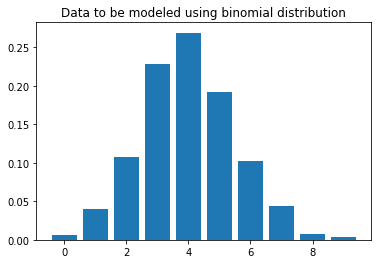

In [124]:
plt.bar(list(datadic.keys()),[datadic[key] for key in list(datadic.keys())])
plt.title("Data to be modeled using binomial distribution")
plt.show()

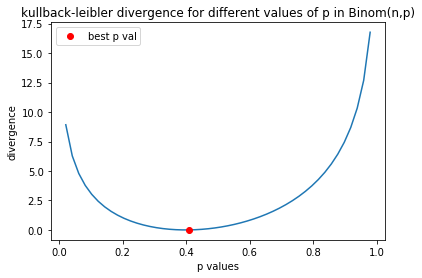

In [132]:
plt.plot(pvals,[divs[p1] for p1 in pvals])
plt.plot(minp,divs[minp],"ro",label="best p val")
plt.legend()
plt.title("kullback-leibler divergence for different values of p in Binom(n,p)")
plt.xlabel("p values")
plt.ylabel("divergence")
plt.show()

In [133]:
minp

0.4081632653061224

We set $p=0.4$ before at the beginning and we see that using this measure we can find the optimal p value.